In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import gmaps

from numpy.random import seed
seed(1)

from scipy import stats
from scipy.stats import linregress

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# df['date'] = pd.to_datetime(df["date"])
# df.head()

df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

df.columns.values
df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [5]:
list(df.columns)

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month',
 'year']

In [6]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [7]:
df.describe

<bound method NDFrame.describe of                id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_basement  y

In [8]:
corrDf = df.drop(columns=['id', 'zipcode'])
corrMatrix = corrDf.corr()
print (corrMatrix)


                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

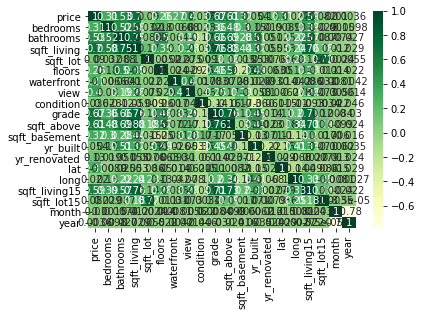

In [9]:
sn.heatmap(corrMatrix, annot=True, cmap="YlGn")
plt.rcParams["figure.figsize"] = (20,20)
plt.savefig('housing.png')
plt.show()


In [10]:
corrDf.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
month              int64
year               int64
dtype: object

In [11]:
# Create a map usingcoordinates to set markers
price= df['price'].astype('float')

marker_locations = df[['lat', 'long']].astype(float)

# Create a heat_layer 

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = price,
                                 dissipating=True, max_intensity=np.max(price), 
                                point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
# Create a map usingcoordinates to set markers
grade= df['grade'].astype('float')

marker_locations = df[['lat', 'long']].astype(float)

# Create a heat_layer 

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(marker_locations, weights = grade,
                                 dissipating=True, max_intensity=np.max(grade), 
                                point_radius=2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

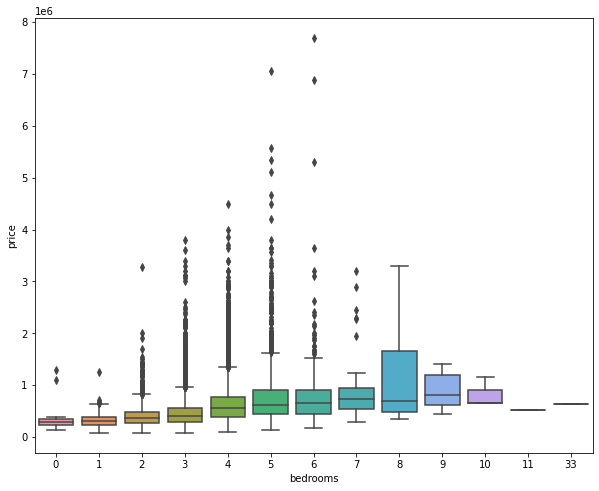

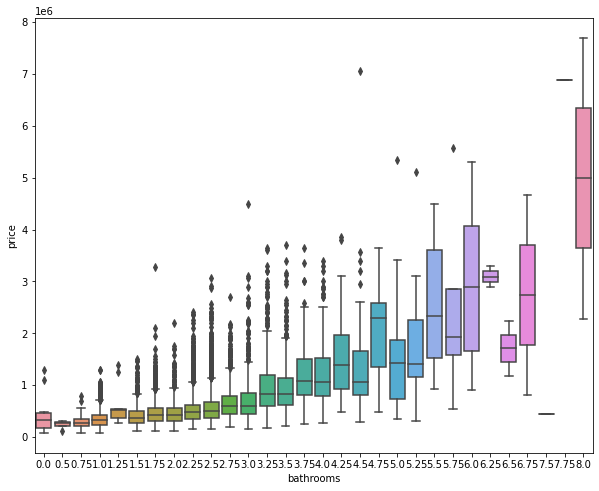

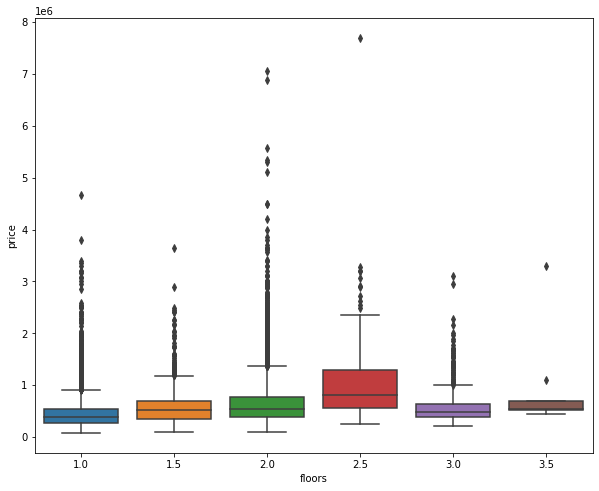

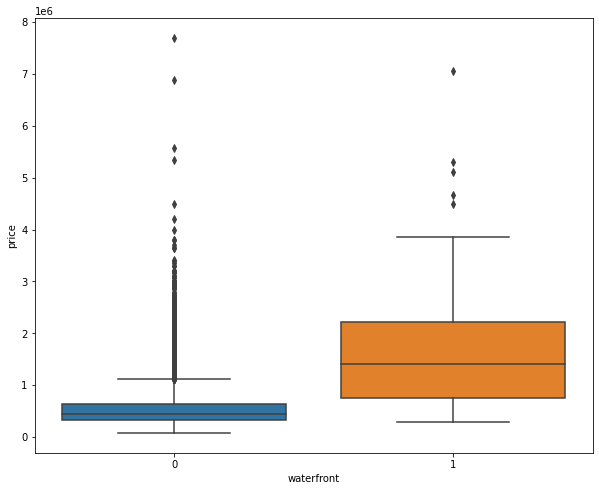

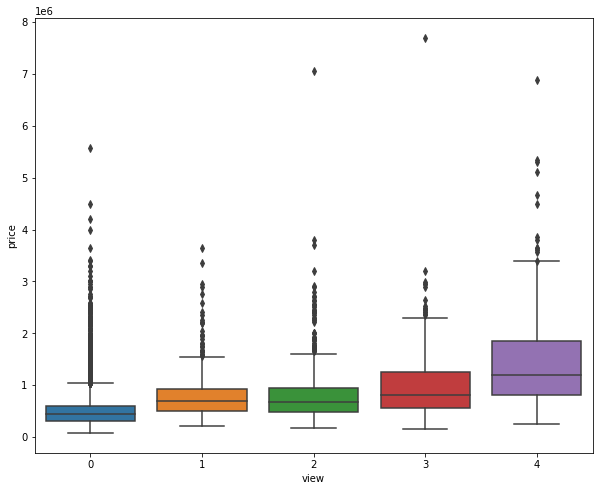

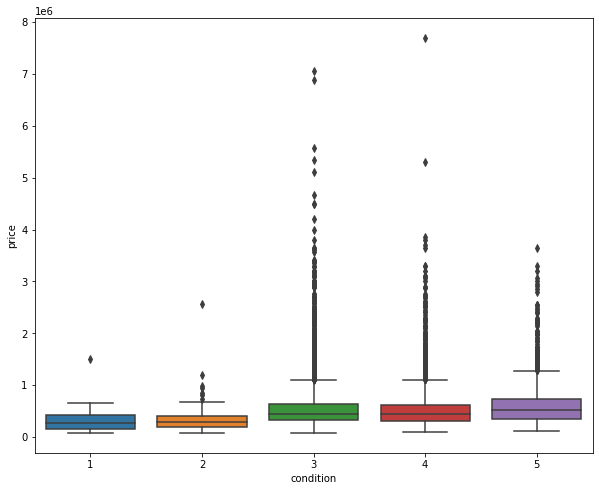

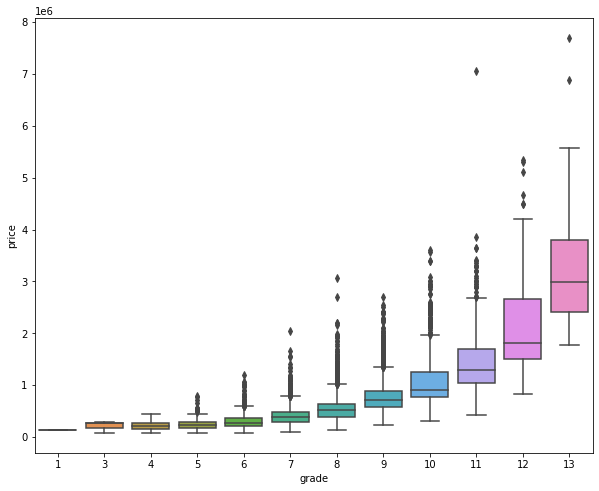

In [13]:
groups= ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

for column_name in groups:
    plt.figure(figsize=(10,8))
    sn.boxplot(x=column_name, y='price', data=df)

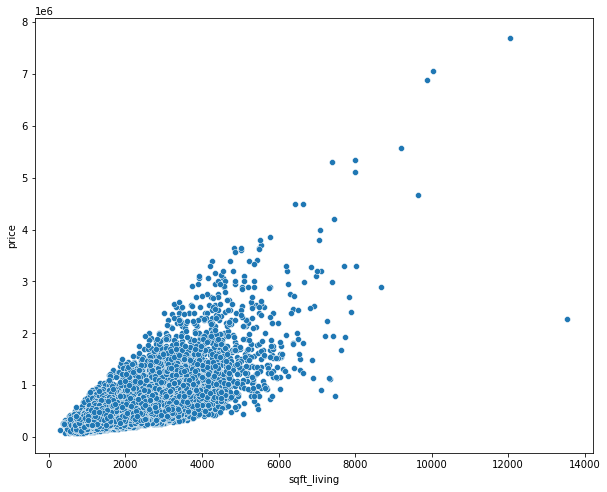

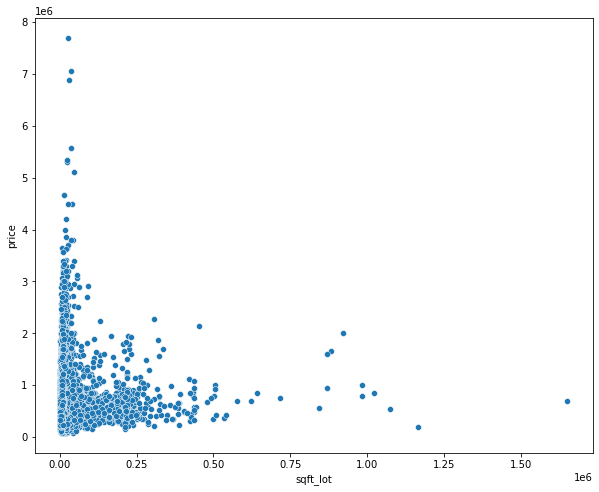

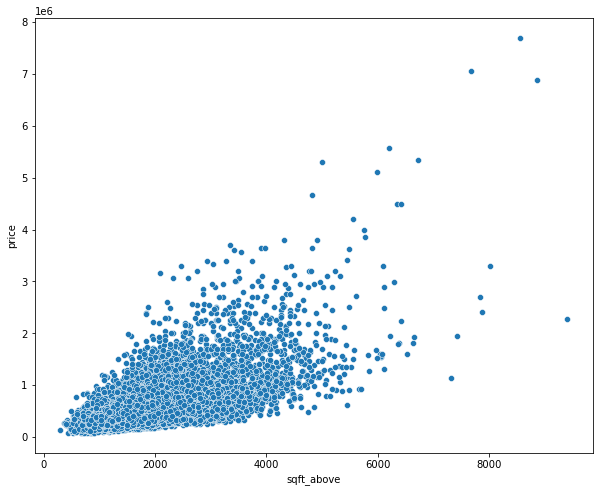

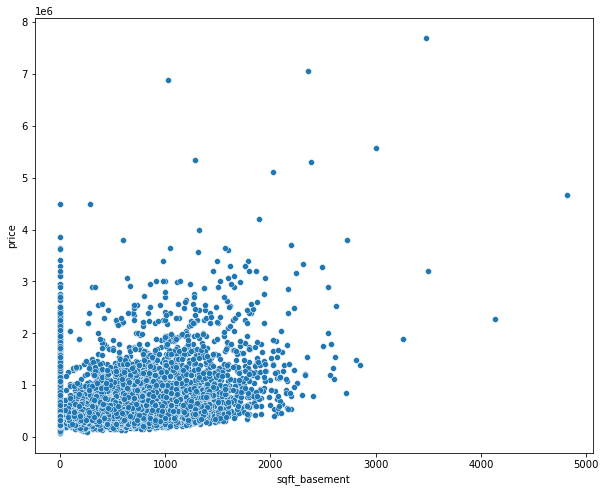

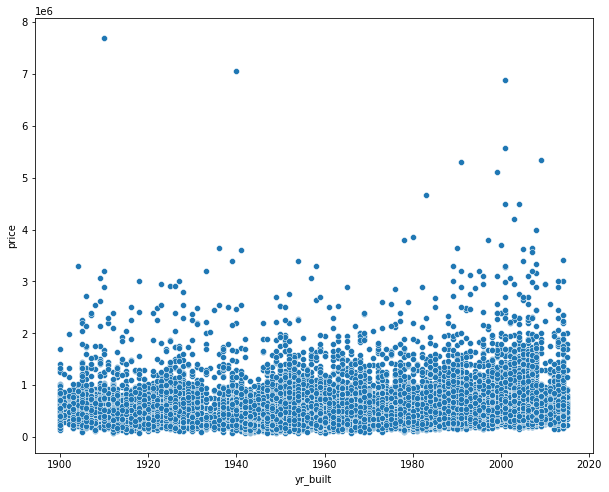

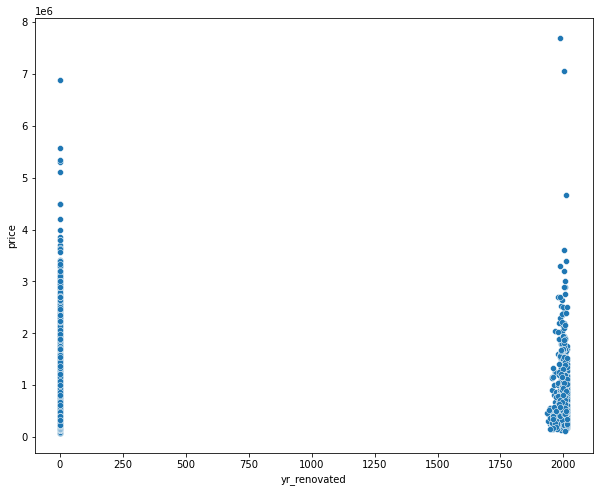

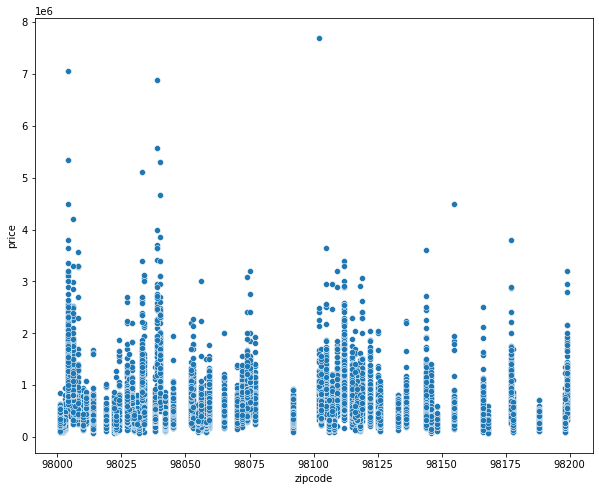

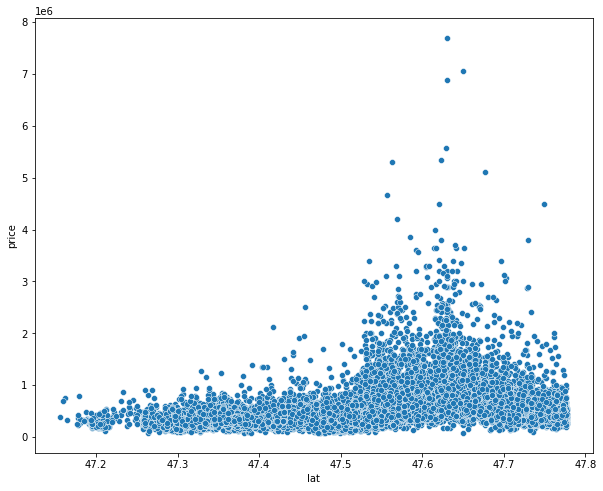

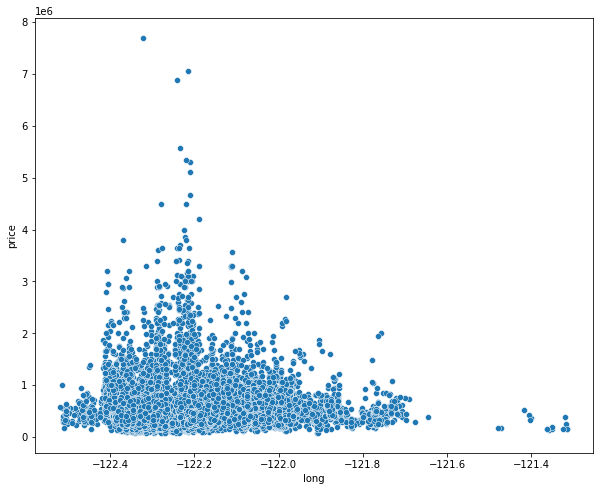

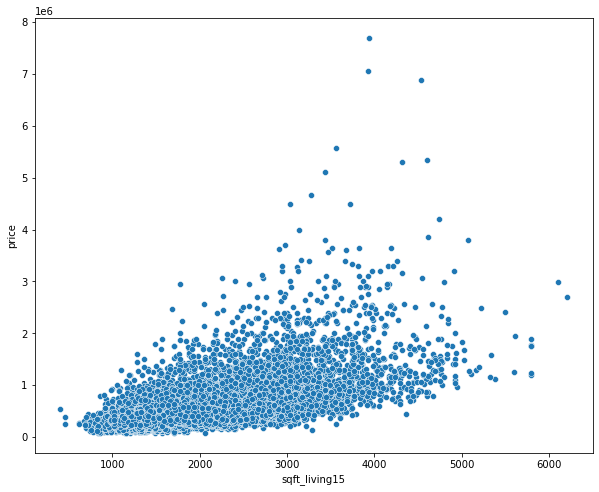

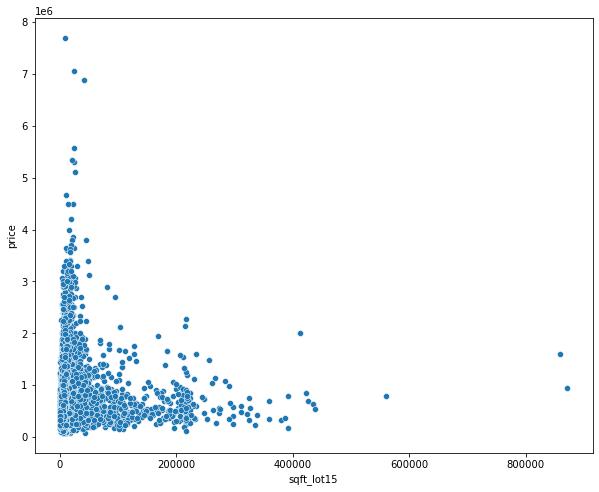

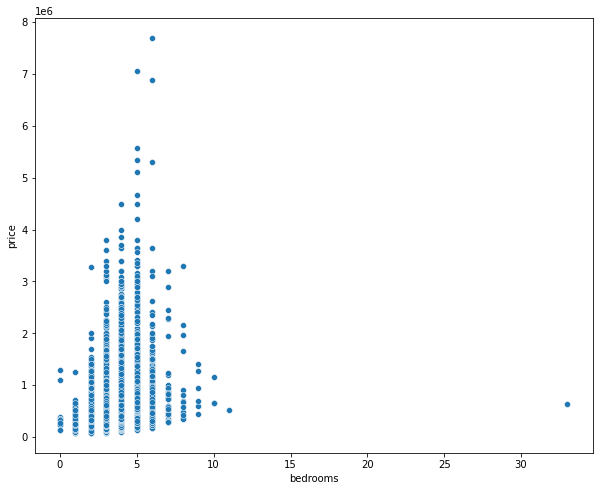

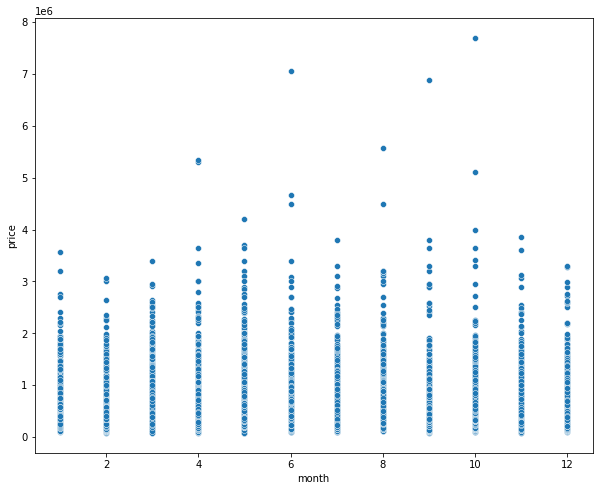

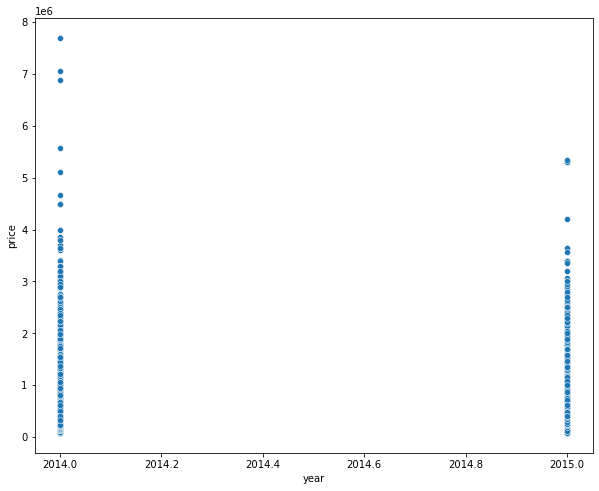

In [14]:
groups2= ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'month', 'year' ]

for column_name in groups2:
    plt.figure(figsize=(10,8))
    sn.scatterplot(x=column_name, y='price', data=df)

In [15]:
df2 = df.drop(columns='id')
df2.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,...,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.010081,0.003576
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,...,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.001533,-0.009838
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,...,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.007392,-0.026596
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,...,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.011810,-0.029038
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,...,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.002369,0.005468
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,...,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.014005,-0.022315
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,...,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.008132,-0.004165
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,...,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,-0.005638,0.001364
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,...,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.021978,-0.045589
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,...,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.008376,-0.030387


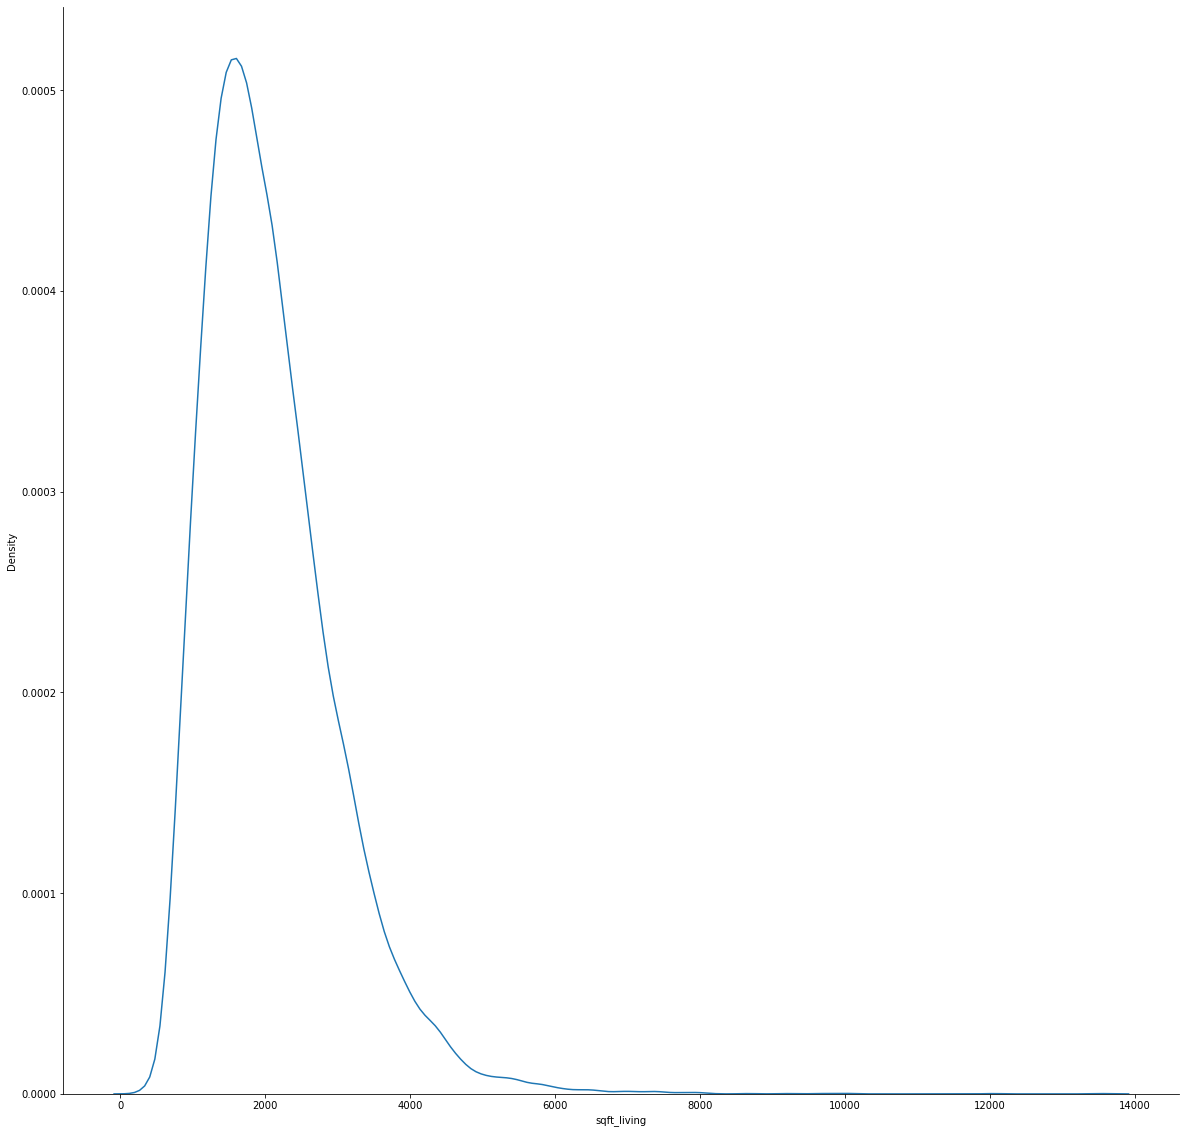

In [16]:
sn.kdeplot(data=df2.sqft_living)
sn.despine()

In [17]:
X=corrDf.drop("price", axis=1)
y=corrDf['price']

print(X.shape, y.shape)



(21613, 19) (21613,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=101, test_size=0.3)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Max: ',X_train.max())
print('Min: ', X_train.min())


Max:  1.0000000000000002
Min:  0.0


In [19]:
model = Sequential()

model.add(Dense(19,activation='relu'))


model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

In [20]:
model.compile(optimizer='adam',loss='mse')

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 7ms/step - loss: 423618183168.0000 - val_loss: 432971644928.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 422323486720.0000 - val_loss: 428566675456.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 405718138880.0000 - val_loss: 390528499712.0000
Epoch 4/400
119/119 [==============================] - 0s 4ms/step - loss: 327916126208.0000 - val_loss: 264615198720.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 180932411392.0000 - val_loss: 126647918592.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 104808775680.0000 - val_loss: 104780120064.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 98642010112.0000 - val_loss: 103023017984.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 97159380992.0000 - val_loss: 101480243200.0000
Epoch 9/400
119/11

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 33412888576.0000 - val_loss: 32661981184.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 33349918720.0000 - val_loss: 32628572160.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 33304330240.0000 - val_loss: 32602462208.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 33299283968.0000 - val_loss: 32555520000.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 33227188224.0000 - val_loss: 32527722496.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 33187092480.0000 - val_loss: 32508409856.0000
Epoch 141/400
119/119 [==============================] - ETA: 0s - loss: 32976596992.000 - 0s 3ms/step - loss: 33181378560.0000 - val_loss: 32458186752.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 33126600704.0000 - val_loss:

119/119 [==============================] - 0s 2ms/step - loss: 30427324416.0000 - val_loss: 29952061440.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30472622080.0000 - val_loss: 29939107840.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30442366976.0000 - val_loss: 29926457344.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30399531008.0000 - val_loss: 29921771520.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30418634752.0000 - val_loss: 29934729216.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30376181760.0000 - val_loss: 29920059392.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30307508224.0000 - val_loss: 29914767360.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30320805888.0000 - val_loss: 29864943616.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 28289456128.0000 - val_loss: 28203728896.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 28281661440.0000 - val_loss: 28166410240.0000


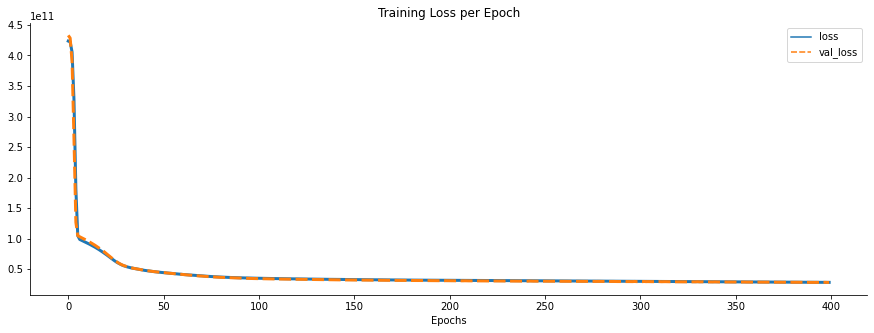

In [21]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sn.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sn.despine()


In [22]:
predictions = model.predict(X_test)


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

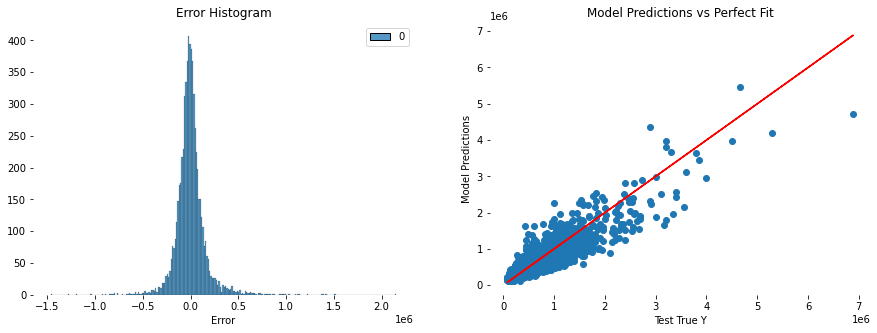

In [23]:
f, axes = plt.subplots(1, 2,figsize=(15,5))


plt.scatter(y_test,predictions)


plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sn.histplot(errors, ax=axes[0])

sn.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [24]:
house1 = corrDf.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{house1}')

house1 = scaler.transform(house1.values.reshape(-1, 19))

print('\nOriginal Price:', corrDf.iloc[0]['price'])

print('\nPredicted Price:',model.predict(house1)[0,0])


Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

Original Price: 221900.0

Predicted Price: 283705.44
